# Datetime Features

In [1]:
%cd '/content/drive/MyDrive/Machine Learning/12. Feature Engineering'

/content/drive/MyDrive/Machine Learning/12. Feature Engineering


In [2]:
%ls

 agent_classification.csv    'No2 dataset.csv'         train_bm.csv
'Feature Engineering.ipynb'  'stroke prediction.csv'   train_loan.csv


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('No2 dataset.csv')
df.head()

,Date_Time,NO2(GT)
0,10/03/2004 18.00.00,166
1,10/03/2004 19.00.00,1174
2,10/03/2004 20.00.00,131
3,10/03/2004 21.00.00,172
4,10/03/2004 22.00.00,131


In [5]:
df['Date_Time'].max(), df['Date_Time'].min()

('31/08/2004 23.00.00', '01/04/2004 00.00.00')

In [6]:
df.dtypes

Date_Time    object
NO2(GT)       int64
dtype: object

In [7]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format= '%d/%m/%Y %H.%M.%S')
df.dtypes

Date_Time    datetime64[ns]
NO2(GT)               int64
dtype: object

In [8]:
df['Date_Time'].max(), df['Date_Time'].min()

(Timestamp('2004-09-24 02:00:00'), Timestamp('2004-03-10 18:00:00'))

In [9]:
df['Date_Time'].dt.hour.head()

0    18
1    19
2    20
3    21
4    22
Name: Date_Time, dtype: int64

In [10]:
df['Date_Time'].dt.minute.head()

0    0
1    0
2    0
3    0
4    0
Name: Date_Time, dtype: int64

In [11]:
df['Date_Time'].dt.dayofweek.head(7) 

0    2
1    2
2    2
3    2
4    2
5    2
6    3
Name: Date_Time, dtype: int64

In [17]:
df['Date_Time'].dt.day_name()

0       Wednesday
1       Wednesday
2       Wednesday
3       Wednesday
4       Wednesday
          ...    
4732     Thursday
4733     Thursday
4734       Friday
4735       Friday
4736       Friday
Name: Date_Time, Length: 4737, dtype: object

In [18]:
df['Date_Time'].dt.month.head(7)

0    3
1    3
2    3
3    3
4    3
5    3
6    3
Name: Date_Time, dtype: int64

In [19]:
df['Date_Time'].dt.is_month_end.head(7)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
Name: Date_Time, dtype: bool

In [21]:
# Put it all together
new_df = pd.DataFrame({"year": df['Date_Time'].dt.year,
              "month": df['Date_Time'].dt.month,
              "day": df['Date_Time'].dt.day,
              "hour": df['Date_Time'].dt.hour,
              "dayofyear": df['Date_Time'].dt.dayofyear,
              "week": df['Date_Time'].dt.week,
              "dayofweek": df['Date_Time'].dt.dayofweek,
              "dayofweekname": df['Date_Time'].dt.day_name,
              "quarter": df['Date_Time'].dt.quarter,
             })
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


,year,month,day,hour,dayofyear,week,dayofweek,dayofweekname,quarter
0,2004,3,10,18,70,11,2,<bound method PandasDelegate._add_delegate_acc...,1
1,2004,3,10,19,70,11,2,<bound method PandasDelegate._add_delegate_acc...,1
2,2004,3,10,20,70,11,2,<bound method PandasDelegate._add_delegate_acc...,1
3,2004,3,10,21,70,11,2,<bound method PandasDelegate._add_delegate_acc...,1
4,2004,3,10,22,70,11,2,<bound method PandasDelegate._add_delegate_acc...,1


In [22]:
complete_data = pd.concat([df, new_df], axis=1)
complete_data.head()

,Date_Time,NO2(GT),year,month,day,hour,dayofyear,week,dayofweek,dayofweekname,quarter
0,2004-03-10 18:00:00,166,2004,3,10,18,70,11,2,<bound method PandasDelegate._add_delegate_acc...,1
1,2004-03-10 19:00:00,1174,2004,3,10,19,70,11,2,<bound method PandasDelegate._add_delegate_acc...,1
2,2004-03-10 20:00:00,131,2004,3,10,20,70,11,2,<bound method PandasDelegate._add_delegate_acc...,1
3,2004-03-10 21:00:00,172,2004,3,10,21,70,11,2,<bound method PandasDelegate._add_delegate_acc...,1
4,2004-03-10 22:00:00,131,2004,3,10,22,70,11,2,<bound method PandasDelegate._add_delegate_acc...,1


In [23]:
# is_weekday?
complete_data['is_weekday']=0 

for i in range(0, len(complete_data)):
    if ((complete_data['dayofweek'][i] == 5) | (complete_data['dayofweek'][i] == 6)):
        complete_data['is_weekday'][i] = 0
    else: 
        complete_data['is_weekday'][i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
complete_data[['dayofweek', 'is_weekday']].head()

,dayofweek,is_weekday
0,2,1
1,2,1
2,2,1
3,2,1
4,2,1


In [25]:
# Difference Between Dates
agent = pd.read_csv('agent_classification.csv')
agent.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [26]:
agent[['Application_Receipt_Date','Applicant_BirthDate']].head()

,Application_Receipt_Date,Applicant_BirthDate
0,4/16/2007,12/19/1971
1,4/16/2007,2/17/1983
2,4/16/2007,1/16/1966
3,4/16/2007,2/3/1988
4,4/16/2007,7/4/1985


In [27]:
agent['Application_Receipt_Date'] = pd.to_datetime(agent['Application_Receipt_Date'], format='%m/%d/%Y')
agent['Applicant_BirthDate'] = pd.to_datetime(agent['Applicant_BirthDate'], format='%m/%d/%Y')

In [28]:
(agent['Application_Receipt_Date'][0] - agent['Applicant_BirthDate'][0]).days

12902

In [29]:
agent['Applicant_age'] = agent.apply(lambda x: (x['Application_Receipt_Date'] - x['Applicant_BirthDate']).days, axis=1)

# Feature Transformation

In [30]:
bigmart = pd.read_csv('train_bm.csv')

In [31]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
bigmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

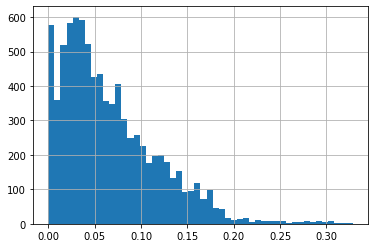

In [33]:
bigmart['Item_Visibility'].hist(bins=50)

In [35]:
import numpy as np

In [36]:
item_visibility_squareroot = np.sqrt(bigmart['Item_Visibility'])

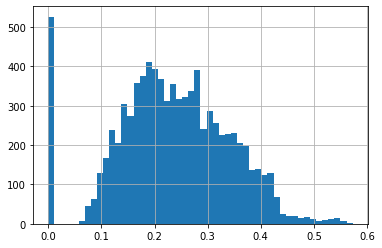

In [37]:
item_visibility_squareroot.hist(bins=50)

In [38]:
item_visibility_log = np.log(bigmart['Item_Visibility'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
bigmart['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

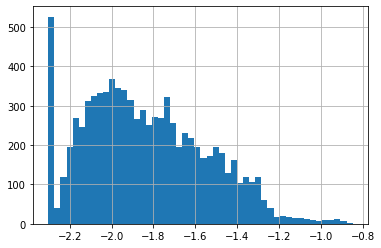

In [40]:
item_visibility_log = np.log(bigmart['Item_Visibility']+0.1)
item_visibility_log.hist(bins=50)

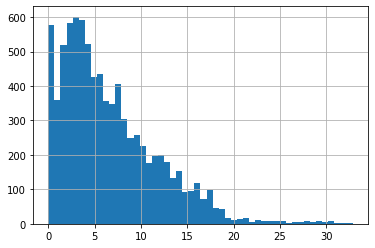

In [41]:
visibility = bigmart['Item_Visibility']*100
visibility.hist(bins=50)

In [42]:
log_visibility = np.log(visibility+1)

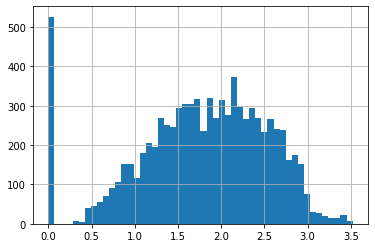

In [43]:
log_visibility.hist(bins=50)

```
Now we see that the distribution is symmetric and also the values are positive.


# Feature Scaling

In [44]:
bigmart = pd.read_csv('train_bm.csv')

In [45]:
data = bigmart[['Item_Visibility', 'Item_MRP']]
data.head()

,Item_Visibility,Item_MRP
0,0.016047,249.8092
1,0.019278,48.2692
2,0.016760,141.6180
3,0.000000,182.0950
4,0.000000,53.8614


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Item_Visibility', 'Item_MRP'])
scaled_data.head()

,Item_Visibility,Item_MRP
0,0.048866,0.927507
1,0.058705,0.072068
2,0.051037,0.468288
3,0.000000,0.640093
4,0.000000,0.095805


In [48]:
scaled_data.describe()

,Item_Visibility,Item_MRP
count,8523.000000,8523.000000
mean,0.201382,0.465635
std,0.157123,0.264327
min,0.000000,0.000000
25%,0.082187,0.265437
50%,0.164228,0.474209
75%,0.288026,0.655156
max,1.000000,1.000000


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Item_Visibility', 'Item_MRP'])
scaled_data.head()

,Item_Visibility,Item_MRP
0,-0.970732,1.747454
1,-0.908111,-1.489023
2,-0.956917,0.010040
3,-1.281758,0.660050
4,-1.281758,-1.399220


In [51]:
scaled_data.describe()

,Item_Visibility,Item_MRP
count,8.523000e+03,8.523000e+03
mean,-8.548444e-17,-1.644427e-16
std,1.000059e+00,1.000059e+00
min,-1.281758e+00,-1.761688e+00
25%,-7.586531e-01,-7.574307e-01
50%,-2.364792e-01,3.243893e-02
75%,5.514755e-01,7.170372e-01
max,5.083050e+00,2.021724e+00


# One Hot and Label Encoding

In [52]:
bigmart = pd.read_csv('train_bm.csv')

In [53]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [54]:
bigmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [55]:
bigmart['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [56]:
pd.get_dummies(bigmart['Outlet_Type']).head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [57]:
bigmart_encoded = pd.get_dummies(bigmart)
bigmart_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,...,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


We have two problems here: 

#### Problem 1:
Look at the newly created variables *'Outlet_Size_High 	Outlet_Size_Medium 	Outlet_Size_Small'*, the order between these variables is destroyed. As a result we are missing out on some important information.

In [58]:
bigmart_encoded[['Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small']].head()

,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,0
4,1,0,0


#### Problem 2
The number of features has increased from 12 to 1600, where maximum values are 0.

In [59]:
bigmart.shape, bigmart_encoded.shape

((8523, 12), (8523, 1605))

In [64]:
# Problem 1 solution
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [65]:
bigmart['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [66]:
le.fit_transform(['Small', 'Medium', 'High'])

array([2, 1, 0])

In [67]:
bigmart['Outlet_Size'] = bigmart['Outlet_Size'].map({'Small': 0,
                                                     'Medium': 1,
                                                     'High': 2})

In [68]:
bigmart['Outlet_Size'].head()

0    1.0
1    1.0
2    1.0
3    NaN
4    2.0
Name: Outlet_Size, dtype: float64

# Combining sparse classes

In [69]:
bigmart = pd.read_csv('train_bm.csv')

In [76]:
# Problem 2 solution

In [77]:
bigmart.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [78]:
bigmart['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [79]:
temp= bigmart['Item_Identifier'].value_counts()
temp.head()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
Name: Item_Identifier, dtype: int64

In [80]:
bigmart['Item_identifier_count'] = bigmart['Item_Identifier'].apply(lambda x: temp[x])
bigmart[['Item_Identifier','Item_identifier_count']].head()

,Item_Identifier,Item_identifier_count
0,FDA15,8
1,DRC01,6
2,FDN15,7
3,FDX07,6
4,NCD19,6


In [81]:
for i in range(0, len(bigmart)):
    if bigmart['Item_identifier_count'][i] < 4:
        bigmart['Item_Identifier'][i] = 'other'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
bigmart.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_identifier_count
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,8
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,6
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,7
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,6
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6
5,other,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,3
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,8


In [83]:
bigmart['Item_Identifier'].value_counts()

other    418
FDG33     10
FDW13     10
FDW26      9
NCY18      9
        ... 
DRJ25      4
FDP32      4
FDQ28      4
FDJ07      4
FDD28      4
Name: Item_Identifier, Length: 1403, dtype: int64

# Binning

In [84]:
stroke_data = pd.read_csv('stroke prediction.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [85]:
bins=[0,12,19,30,60,90]
group=['child','teenager','young_adult','middle_aged', 'senior_citizen']
stroke_data['age_category']=pd.cut(stroke_data['age'], bins, labels=group)

In [86]:
stroke_data[['age', 'age_category']].head()

,age,age_category
0,3.0,child
1,58.0,middle_aged
2,8.0,child
3,70.0,senior_citizen
4,14.0,teenager


In [87]:
bins=[0,49.5,66.5,77.5,90]
group=['Bin_1','Bin_2','Bin_3','Bin_4']
stroke_data['age_category']=pd.cut(stroke_data['age'], bins, labels=group)

In [88]:
stroke_data[['age', 'age_category']].head()

,age,age_category
0,3.0,Bin_1
1,58.0,Bin_2
2,8.0,Bin_1
3,70.0,Bin_3
4,14.0,Bin_1


# Feature Interaction

In [89]:
loan_data = pd.read_csv('train_loan.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [90]:
loan_data['Total_income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome'] 
loan_data[['ApplicantIncome', 'CoapplicantIncome', 'Total_income']].head()

,ApplicantIncome,CoapplicantIncome,Total_income
0,5849,0.0,5849.0
1,4583,1508.0,6091.0
2,3000,0.0,3000.0
3,2583,2358.0,4941.0
4,6000,0.0,6000.0


In [91]:
loan_data['loan_income_ratio'] = loan_data['LoanAmount'] / loan_data['ApplicantIncome']
loan_data[['ApplicantIncome', 'LoanAmount', 'loan_income_ratio']].head()

,ApplicantIncome,LoanAmount,loan_income_ratio
0,5849,NaN,NaN
1,4583,128.0,0.027929
2,3000,66.0,0.022000
3,2583,120.0,0.046458
4,6000,141.0,0.023500


# Using Missing Values

In [92]:
stroke_data = pd.read_csv('stroke prediction.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [93]:
stroke_data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [94]:
stroke_data["smoking_status_NA"]=stroke_data["smoking_status"].isnull()*1

In [95]:
stroke_data[['smoking_status_NA', 'smoking_status']].head()

,smoking_status_NA,smoking_status
0,1,NaN
1,0,never smoked
2,1,NaN
3,0,formerly smoked
4,1,NaN


# Frequency Encoding

In [96]:
bigmart= pd.read_csv('train_bm.csv')
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [97]:
bigmart['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [98]:
temp = bigmart['Item_Type'].value_counts()
temp.head()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: Item_Type, dtype: int64

In [99]:
bigmart['Item_type_count'] = bigmart['Item_Type'].apply(lambda x: temp[x])
bigmart[['Item_Identifier', 'Item_Type', 'Item_type_count']].head()

,Item_Identifier,Item_Type,Item_type_count
0,FDA15,Dairy,682
1,DRC01,Soft Drinks,445
2,FDN15,Meat,425
3,FDX07,Fruits and Vegetables,1232
4,NCD19,Household,910


In [100]:
# Mean Encoding (using Target Variable)
bigmart[['Item_Type', 'Item_Outlet_Sales']].head()

,Item_Type,Item_Outlet_Sales
0,Dairy,3735.1380
1,Soft Drinks,443.4228
2,Meat,2097.2700
3,Fruits and Vegetables,732.3800
4,Household,994.7052


In [101]:
bigmart.groupby('Item_Type')['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64